In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df =df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

<Axes: xlabel='Target', ylabel='count'>

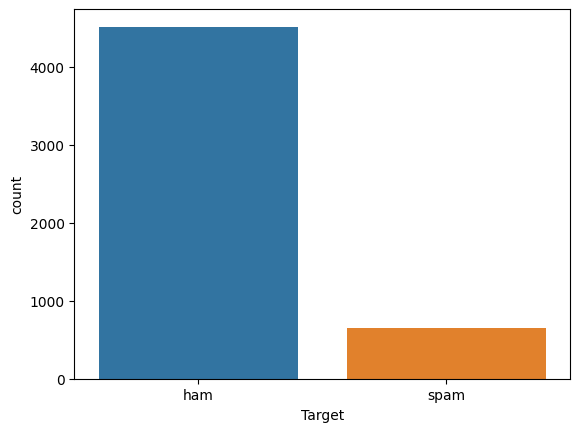

In [ ]:
sns.countplot(x='Target',data=df)

Splitting data into independent and dependent variables

In [ ]:
x=df['Message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [ ]:
y=df['Target']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5169, dtype: object

Splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
print(x_train)

  (0, 4100)	1
  (0, 6987)	4
  (0, 4297)	1
  (0, 6707)	1
  (0, 3841)	1
  (1, 6692)	1
  (1, 835)	1
  (1, 3195)	1
  (1, 2162)	1
  (1, 6196)	1
  (1, 5574)	1
  (1, 1487)	1
  (1, 6910)	1
  (1, 1156)	1
  (1, 3289)	1
  (1, 5485)	1
  (2, 5632)	1
  (2, 3311)	1
  (2, 4211)	1
  (2, 6685)	1
  (2, 2672)	1
  (2, 2429)	1
  (2, 6311)	1
  (2, 2833)	1
  (2, 4567)	1
  :	:
  (3616, 2301)	1
  (3616, 4746)	1
  (3616, 5617)	1
  (3617, 4567)	1
  (3617, 5711)	1
  (3617, 3052)	1
  (3617, 6876)	1
  (3617, 3411)	1
  (3617, 4496)	1
  (3617, 6550)	1
  (3617, 3931)	1
  (3617, 6825)	3
  (3617, 1440)	1
  (3617, 3813)	1
  (3617, 2597)	1
  (3617, 1781)	1
  (3617, 6222)	1
  (3617, 5787)	1
  (3617, 6233)	1
  (3617, 5442)	1
  (3617, 710)	1
  (3617, 5253)	1
  (3617, 188)	1
  (3617, 5902)	1
  (3617, 42)	1


Model Creation

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1331    0]
 [ 174   46]]
0.8878143133462283
              precision    recall  f1-score   support

         ham       0.88      1.00      0.94      1331
        spam       1.00      0.21      0.35       220

    accuracy                           0.89      1551
   macro avg       0.94      0.60      0.64      1551
weighted avg       0.90      0.89      0.85      1551



Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
bayes=MultinomialNB()
bayes.fit(x_train,y_train)
y_pred=bayes.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1326    5]
 [  19  201]]
0.9845261121856866
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1331
        spam       0.98      0.91      0.94       220

    accuracy                           0.98      1551
   macro avg       0.98      0.95      0.97      1551
weighted avg       0.98      0.98      0.98      1551



Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1331    0]
 [  33  187]]
0.9787234042553191
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1331
        spam       1.00      0.85      0.92       220

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(random_state=42)
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1311   20]
 [  36  184]]
0.9638942617666022
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1331
        spam       0.90      0.84      0.87       220

    accuracy                           0.96      1551
   macro avg       0.94      0.91      0.92      1551
weighted avg       0.96      0.96      0.96      1551



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1329    2]
 [  43  177]]
0.9709864603481625
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1331
        spam       0.99      0.80      0.89       220

    accuracy                           0.97      1551
   macro avg       0.98      0.90      0.94      1551
weighted avg       0.97      0.97      0.97      1551



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1326    5]
 [  29  191]]
0.9780786589297228
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1331
        spam       0.97      0.87      0.92       220

    accuracy                           0.98      1551
   macro avg       0.98      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551

